In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data from the CSV file
df = pd.read_csv('albums_final.csv')

# Try converting release_date to datetime, but handle errors
def parse_date(date):
    try:
        return pd.to_datetime(date)
    except:
        # If conversion fails (e.g., only year given), return first day of the year
        return pd.to_datetime(f'{date}-01-01', errors='coerce')

# Apply the function to the 'release_date' column
df['release_date'] = df['release_date'].apply(parse_date)

# Create a new column combining year and month
df['release_month_year'] = df['release_date'].dt.to_period('M')
df['release_year'] = df['release_date'].dt.year

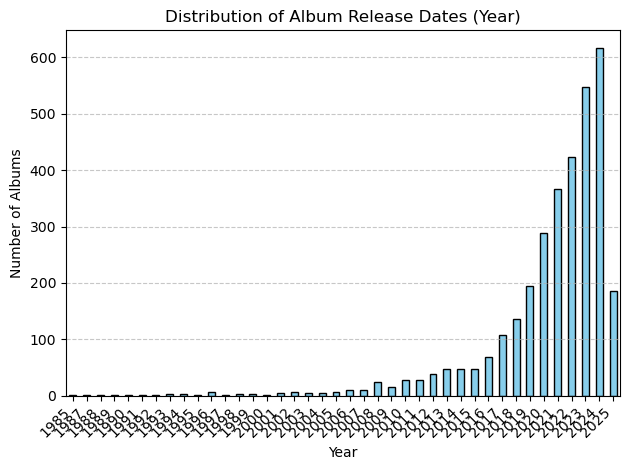

In [4]:
# Plot distribution of album release months and years
plt.figure()
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Album Release Dates (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

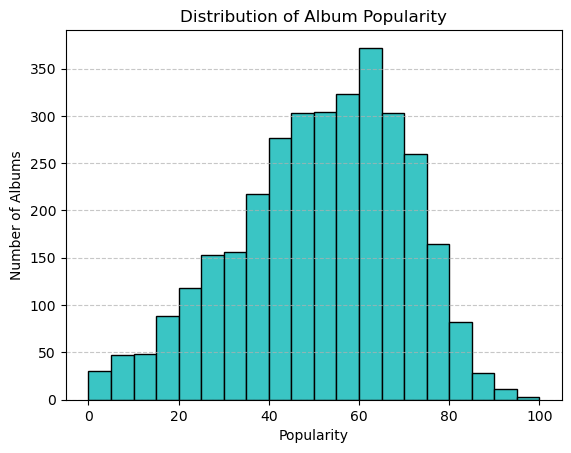

In [5]:
# Plot distribution of album popularity
plt.figure()
plt.hist(df['popularity'], bins=20, edgecolor='black', color='#3AC5C4')
plt.title('Distribution of Album Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Albums')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
df = pd.read_csv('final_eda_df.csv')
df = df.drop(columns=['Unnamed: 0', 'artist_id', 'album_id', 'image_url'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               3262 non-null   object 
 1   genre                     3262 non-null   object 
 2   album_name                3262 non-null   object 
 3   release_date              3262 non-null   object 
 4   total_tracks              3262 non-null   int64  
 5   popularity                3262 non-null   int64  
 6   genre_condensed           3262 non-null   object 
 7   black                     3262 non-null   int64  
 8   blue                      3262 non-null   int64  
 9   gray                      3262 non-null   int64  
 10  green                     3262 non-null   int64  
 11  orange                    3262 non-null   int64  
 12  pink                      3262 non-null   int64  
 13  purple                    3262 non-null   int64  
 14  red     

<Axes: title={'center': 'Average Popularity by Year'}, xlabel='release_year'>

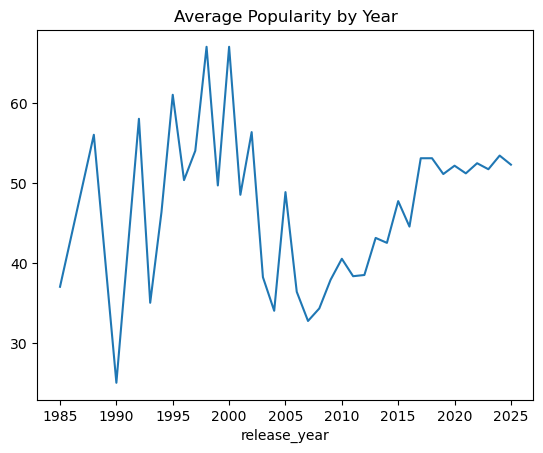

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Time trend of average popularity
df.groupby('release_year')['popularity'].mean().plot(title='Average Popularity by Year')


Text(0.5, 1.0, 'Popularity by Genre')

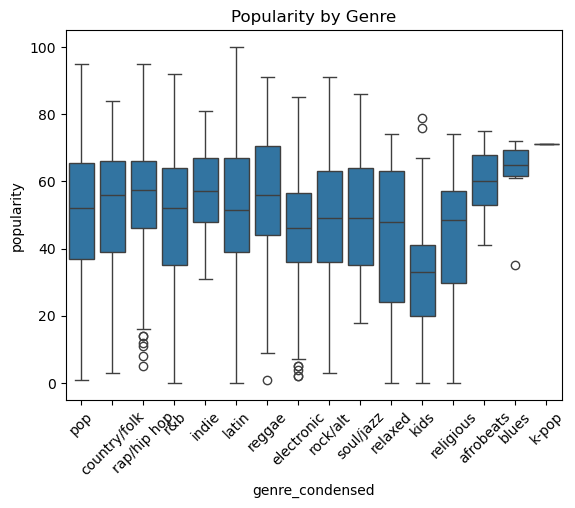

In [8]:
# Popularity by genre
sns.boxplot(data=df, x='genre_condensed', y='popularity')
plt.xticks(rotation=45)
plt.title("Popularity by Genre")

In [9]:
# Correlation with visual style
visual_cols = ['avg_brightness', 'avg_saturation', 'visual_entropy', 'edge_density', 'skin_percentage']
df[visual_cols + ['popularity']].corr()['popularity'].sort_values(ascending=False)

popularity         1.000000
skin_percentage    0.014426
avg_saturation    -0.023234
avg_brightness    -0.054127
edge_density      -0.060427
visual_entropy    -0.068608
Name: popularity, dtype: float64

<Axes: xlabel='is_vibrant', ylabel='popularity'>

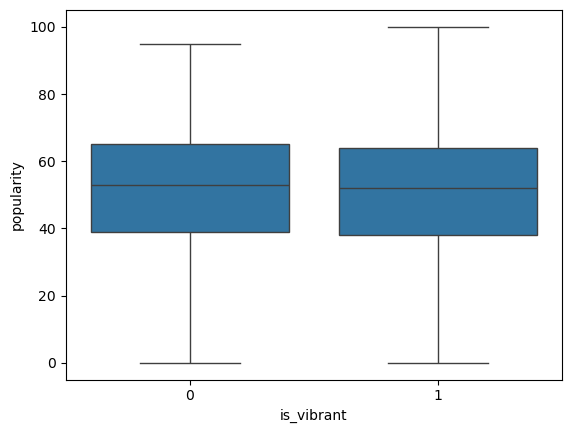

In [10]:
# Are vibrant covers more popular?
sns.boxplot(x='is_vibrant', y='popularity', data=df)

/var/folders/p2/bg9x0srx2dl9dp4nrwmw4nrc0000gn/T/ipykernel_64707/461115056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender_grouped', y='popularity', palette=custom_palette)


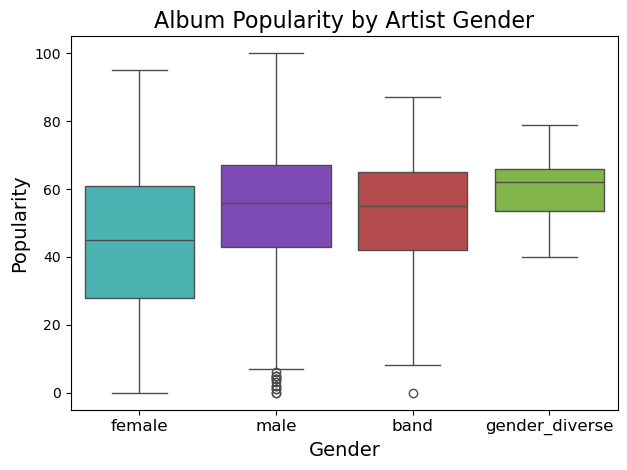

In [11]:
custom_palette = ['#3AC5C4', '#7E3AC5', '#C53A3B', '#81C53A']  # Your cohesive palette

plt.figure()
sns.boxplot(data=df, x='gender_grouped', y='popularity', palette=custom_palette)
plt.title('Album Popularity by Artist Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


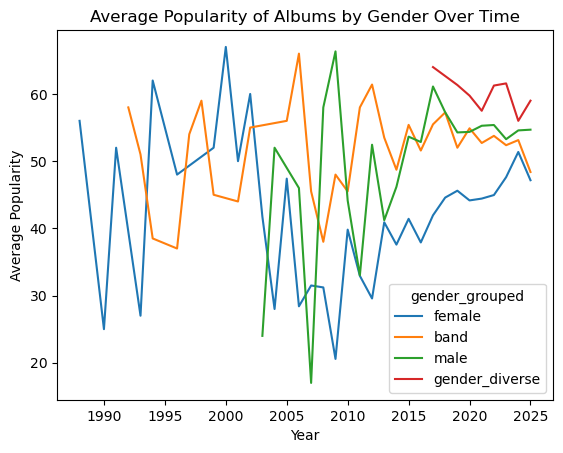

In [12]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

pop_by_gender_year = df.groupby(['release_year', 'gender_grouped'])['popularity'].mean().reset_index()

sns.lineplot(data=pop_by_gender_year, x='release_year', y='popularity', hue='gender_grouped')
plt.title('Average Popularity of Albums by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


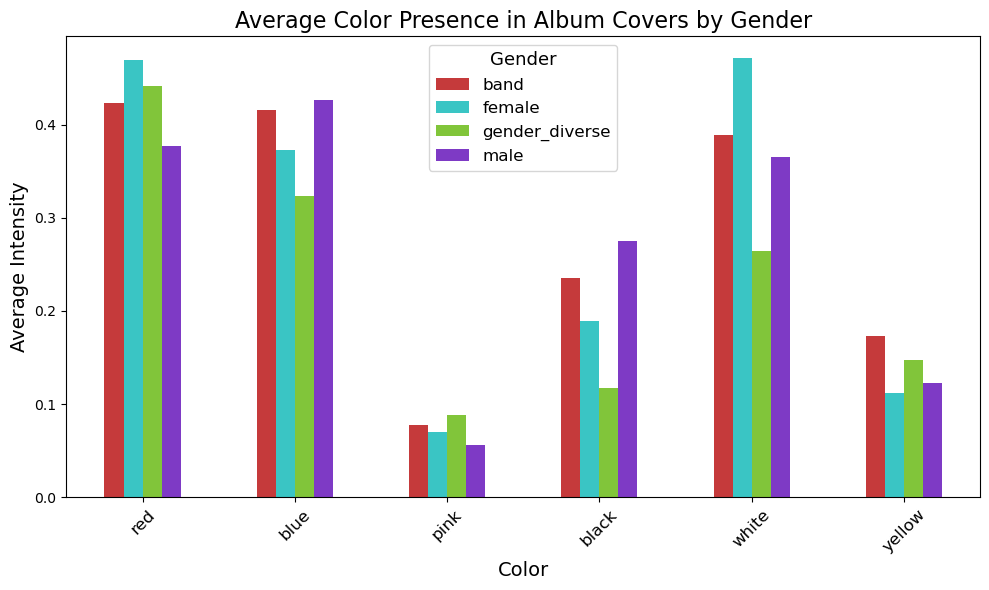

In [16]:
df['popularity_level'] = df['popularity'].apply(lambda x: 'Popular' if x >= 55 else 'Not Popular')

color_cols = ['red', 'blue', 'pink', 'black', 'white', 'yellow']
df_color_gender = df.groupby('gender_grouped')[color_cols].mean().T

custom_palette = ['#3AC5C4', '#7E3AC5', '#C53A3B', '#81C53A']  # Same as the first graph
gender_order = df_color_gender.columns
palette_dict = dict(zip(['female', 'male', 'band', 'gender_diverse'], custom_palette))
ordered_colors = [palette_dict[gender] for gender in gender_order]

df_color_gender.plot(kind='bar', figsize=(10, 6), color=ordered_colors)
plt.title('Average Color Presence in Album Covers by Gender', fontsize=16)
plt.ylabel('Average Intensity', fontsize=14)
plt.xlabel('Color', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()



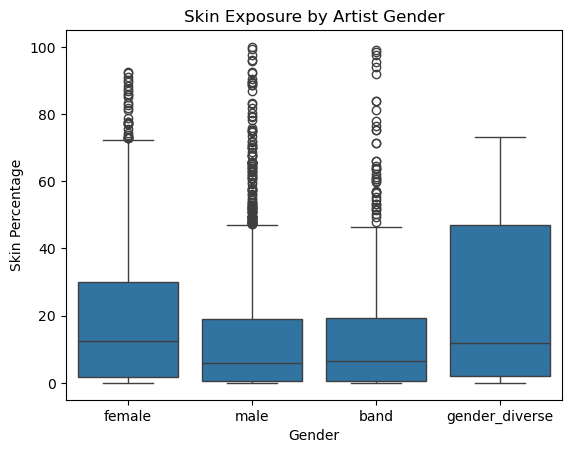

In [14]:
sns.boxplot(data=df, x='gender_grouped', y='skin_percentage')
plt.title('Skin Exposure by Artist Gender')
plt.xlabel('Gender')
plt.ylabel('Skin Percentage')
plt.show()


/var/folders/p2/bg9x0srx2dl9dp4nrwmw4nrc0000gn/T/ipykernel_64707/590221249.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


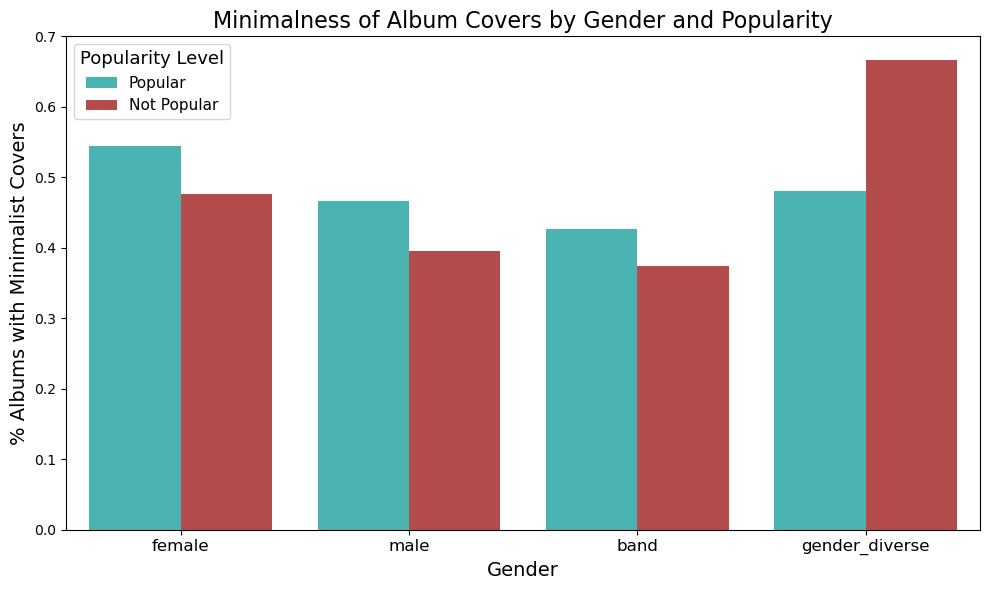

In [19]:
# Define your custom gender color palette
custom_palette = ['#3AC5C4', '#7E3AC5', '#C53A3B', '#81C53A']
palette_dict = dict(zip(['female', 'male', 'band', 'gender_diverse'], custom_palette))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='gender_grouped',
    y='is_minimal',
    hue='popularity_level',
    palette={'Popular': '#3AC5C4', 'Not Popular': '#C53A3B'},  # pick two that fit your aesthetic
    ci=None  # turn off confidence intervals
)

plt.title('Minimalness of Album Covers by Gender and Popularity', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('% Albums with Minimalist Covers', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title='Popularity Level', title_fontsize=13, fontsize=11)
plt.tight_layout()
plt.show()


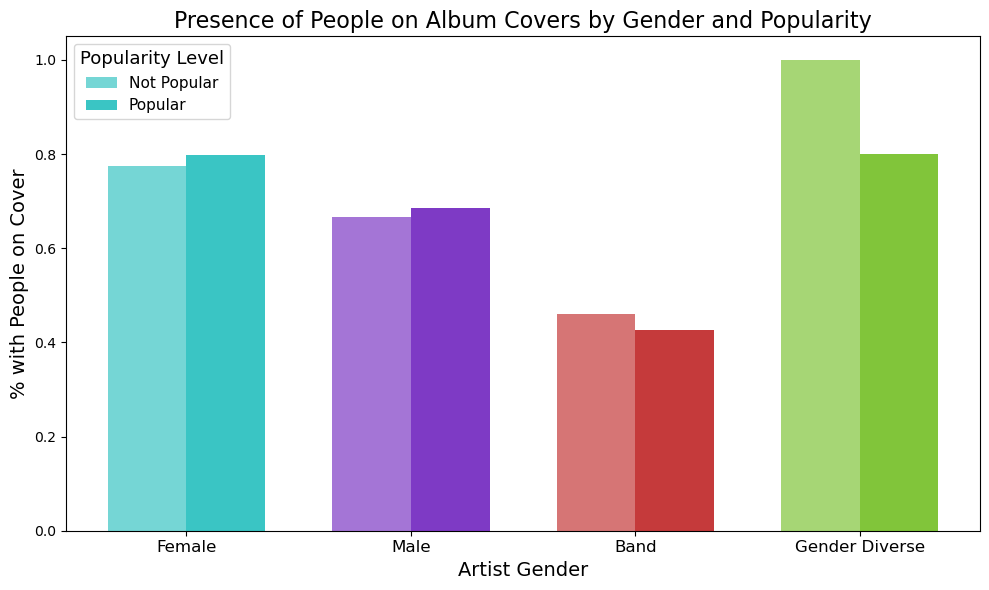

In [ ]:
# Define custom palette and gender order
custom_palette = ['#3AC5C4', '#7E3AC5', '#C53A3B', '#81C53A']
gender_order = ['female', 'male', 'band', 'gender_diverse']
palette_dict = dict(zip(gender_order, custom_palette))

# Create a grouped dataframe for plotting
grouped = df.groupby(['gender_grouped', 'popularity_level'])['has_people'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot bars manually so we control both hue spacing and color
bar_width = 0.35
x = range(len(gender_order))

# Map genders to x positions
gender_to_x = dict(zip(gender_order, x))

# Offset positions for bars
for i, pop_label in enumerate(['Not Popular', 'Popular']):
    offsets = [-bar_width/2, bar_width/2]
    offset = offsets[i]
    for gender in gender_order:
        sub_df = grouped[(grouped['gender_grouped'] == gender) & (grouped['popularity_level'] == pop_label)]
        if not sub_df.empty:
            xpos = gender_to_x[gender] + offset
            plt.bar(
                xpos,
                sub_df['has_people'].values[0],
                width=bar_width,
                color=palette_dict[gender],
                label=pop_label if gender == gender_order[0] else "",  # only label once
                alpha=0.7 if pop_label == 'Not Popular' else 1.0  # subtle transparency for Not Popular
            )

# Customizing axes
plt.xticks(x, ['Female', 'Male', 'Band', 'Gender Diverse'], fontsize=12)
plt.ylabel('% with People on Cover', fontsize=14)
plt.xlabel('Artist Gender', fontsize=14)
plt.title('Presence of People on Album Covers by Gender and Popularity', fontsize=16)
plt.legend(title='Popularity Level', title_fontsize=13, fontsize=11)
plt.tight_layout()
plt.show()


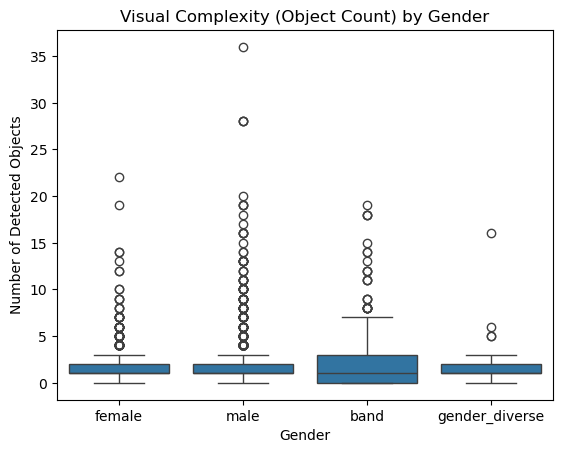

In [ ]:
sns.boxplot(data=df, x='gender_grouped', y='total_object_count')
plt.title('Visual Complexity (Object Count) by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Detected Objects')
plt.show()
